In [102]:
import numpy as np
from plotnine import *
import pandas as pd

In [103]:
results = pd.read_csv("benchmark_results.csv", sep='\t')

In [104]:
nbse_info = pd.read_csv("nbse_sets.csv")

In [105]:
data = results.merge(nbse_info, left_on=['name'], right_on=['set_name'])
data['mcs_size_to_atom_size'] = data['mcs_atoms'] / data['avg_atoms']
data = data.query('local_similarity > 0 and took < 900')
data.set_index(['name', 'optimizer_steps', 'optimizer_fine', 'optimizer_coarse',
                'num_conformers', 'core', 'assemblies'])

,,,,,,,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,divide,set_name,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,avg_atoms_to_mcs,mcs_size_to_atom_size
name,optimizer_steps,optimizer_fine,optimizer_coarse,num_conformers,core,assemblies,,,,,,,,,,,,,,,,
3ke8,100,0.01,0.3,40,mcs,10,18,0.664895,0.629946,2.792387,True,3ke8,17,17,12,11,11,17,14.647,NaN,75.10%,0.751007
2vke,100,0.01,0.3,40,mcs,10,218,0.653470,0.613581,2.697748,True,2vke,42,45,31,34,22,12,33.522,NaN,65.63%,0.656285
1odn,100,0.01,0.3,40,mcs,10,303,0.569305,0.657672,3.152543,True,1odn,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
4dko,100,0.01,0.3,40,mcs,10,43,0.579109,0.458960,4.240663,True,4dko,30,33,23,24,15,13,26.077,NaN,57.52%,0.575220
3qqs,100,0.01,0.3,40,mcs,10,48,0.619915,0.311268,5.187691,True,3qqs,29,31,10,10,8,19,14.789,NaN,54.09%,0.540943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2w0v,100,0.10,0.3,20,murcko,10,215,0.386869,0.525530,7.748903,True,2w0v,39,41,17,18,9,12,28.417,NaN,31.67%,0.316712
3g5h,100,0.10,0.3,20,murcko,10,114,0.491245,0.373138,4.491310,True,3g5h,27,30,12,13,6,18,19.222,NaN,31.21%,0.312142
3id8,100,0.10,0.3,20,murcko,10,354,0.344395,0.536709,6.575580,True,3id8,37,41,19,21,9,12,29.333,NaN,30.68%,0.306822


In [106]:
data[data.name == ('1odn')]

,name,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,divide,...,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,avg_atoms_to_mcs,mcs_size_to_atom_size
2,1odn,303,0.569305,0.657672,3.152543,0.3,0.01,40,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
35,1odn,176,0.622042,0.482279,2.164893,0.5,0.01,10,1,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
66,1odn,269,0.500458,0.624170,2.990656,0.5,0.01,30,1,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
97,1odn,263,0.567596,0.564154,2.747688,0.5,0.01,60,1,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
129,1odn,245,0.622042,0.482279,2.164893,0.3,0.01,10,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
160,1odn,241,0.622042,0.482279,2.164893,0.3,0.01,20,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
191,1odn,261,0.622042,0.482279,2.164893,0.5,0.05,20,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
222,1odn,235,0.622042,0.482279,2.164893,0.5,0.10,20,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
253,1odn,256,0.622042,0.482279,2.164893,0.5,0.20,20,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
292,1odn,138,0.530699,0.500914,2.706710,0.9,0.40,10,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531


In [107]:
data.describe()

,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,optimizer_steps,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,mcs_size_to_atom_size
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.0,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,0.0,331.000000
mean,134.084592,0.519716,0.471426,4.085556,0.455287,0.072145,24.743202,7.335347,100.0,31.830816,34.401813,15.543807,16.226586,9.558912,16.882175,22.872713,NaN,0.418576
std,123.180302,0.096309,0.111327,1.423740,0.151540,0.105514,15.060803,4.114931,0.0,8.606996,9.555826,5.139896,5.871350,3.780974,5.901311,5.752529,NaN,0.116965
min,1.000000,0.297835,0.174775,1.647598,0.300000,0.010000,10.000000,1.000000,100.0,12.000000,12.000000,9.000000,9.000000,4.000000,12.000000,10.769000,NaN,0.197371
25%,42.500000,0.452527,0.386437,2.890898,0.300000,0.010000,10.000000,1.000000,100.0,26.500000,29.000000,11.500000,11.000000,7.000000,13.000000,19.199000,NaN,0.324675
50%,101.000000,0.534917,0.481399,3.746291,0.500000,0.010000,20.000000,10.000000,100.0,30.000000,33.000000,14.000000,15.000000,9.000000,15.000000,23.071000,NaN,0.378380
75%,188.000000,0.610423,0.539554,5.189874,0.500000,0.100000,30.000000,10.000000,100.0,37.000000,41.000000,18.000000,20.000000,11.000000,18.500000,26.077000,NaN,0.475160
max,879.000000,0.719335,0.737755,8.482188,0.900000,0.400000,60.000000,10.000000,100.0,73.000000,80.000000,31.000000,34.000000,22.000000,40.000000,37.294000,NaN,0.751007


In [108]:
metric_cols = ['siena_rmsd', 'avg_conformer_tanimoto_dist',
               'local_similarity']

program_parameters = ['assemblies', 'num_conformers', 'optimizer_coarse',
                      'optimizer_fine', 'optimizer_steps']

set_props = [str(c) for c in nbse_info.columns] + ['mcs_size_to_atom_size']

def lookup_en_name(s: str) -> str:
    name_lookup_en = {
        'name': 'Name',
        'took': 'Runtime',
        'siena_rmsd': 'SIENA RMSD',
        'avg_conformer_tanimoto_dist': 'Conformer Score',
        'local_similarity': 'Local Similarity',
        'most_atoms': 'Most Atoms',
        'least_atoms': 'Least Atoms',
        'most_bonds': 'Most Bonds',
        'least_bonds': 'Least Bonds',
        'num_mols': 'No. Molecules',
        'avg_atoms': 'Avg. Atoms',
        'mcs_atoms': 'Size MCS',
        'mcs_size_to_atom_size': 'Size MCS / Avg. Atoms',
        'optimizer_coarse': 'Optimizer Coarse',
        'optimizer_fine': 'Optimizer Fine',
        'optimizer_steps': 'Optimizer Steps',
        'num_conformers': 'No. Conformers',
        'assemblies': 'Assemblies'
    }

    if s in name_lookup_en:
        return name_lookup_en[s]
    else:
        return s

def lookup_de_name(s: str) -> str:
    name_lookup_de = {
        'name': 'Name',
        'took': 'Laufzeit',
        'siena_rmsd': 'SIENA RMSD',
        'avg_conformer_tanimoto_dist': 'Konformer Distanz',
        'local_similarity': 'Lokale Ähnlichkeit',
        'most_atoms': 'Meiste Atome',
        'least_atoms': 'Kleinste Atome',
        'most_bonds': 'Meiste Bindungen',
        'least_bonds': 'Wenigste Bindungen',
        'num_mols': 'Menge Moleküle',
        'avg_atoms': 'Durschn. Atome',
        'mcs_atoms': 'Größe MCS',
        'mcs_size_to_atom_size': 'MCS / Durchschn. Atome',
        'optimizer_coarse': 'Optimizer Coarse',
        'optimizer_fine': 'Optimizer Fine',
        'optimizer_steps': 'Optimizer Steps',
        'num_conformers': 'Konformere',
        'assemblies': 'Assemblies'
    }
    
    if s in name_lookup_de:
        return name_lookup_de[s]
    else:
        return s


In [109]:
metrics = data.drop(columns=['set_name', 'name', 'divide', 'core', 'mcs_bonds',
                             'avg_atoms_to_mcs'])
metrics.var()

took                           15173.386762
local_similarity                   0.009276
avg_conformer_tanimoto_dist        0.012394
siena_rmsd                         2.027037
optimizer_coarse                   0.022964
optimizer_fine                     0.011133
num_conformers                   226.827795
assemblies                        16.932656
optimizer_steps                    0.000000
most_atoms                        74.080381
most_bonds                        91.313815
least_atoms                       26.418530
least_bonds                       34.472746
mcs_atoms                         14.295761
num_mols                          34.825469
avg_atoms                         33.091588
mcs_size_to_atom_size              0.013681
dtype: float64

In [110]:
data.groupby(program_parameters).agg({ k: 'mean' for k in metrics})

took  \
assemblies num_conformers optimizer_coarse optimizer_fine optimizer_steps               
1          10             0.5              0.01           100              103.870968   
           30             0.5              0.01           100              110.870968   
           60             0.5              0.01           100              127.750000   
10         10             0.3              0.01           100              146.419355   
                          0.9              0.40           100               62.318182   
           20             0.3              0.01           100              136.225806   
                                           0.10           100              277.173913   
                          0.5              0.05           100              121.548387   
                                           0.10           100              117.322581   
                                           0.20           100              118.741935   
           40             0.3              0.01           100              167.636364   

                                                                           local_similarity  \
assemblies num_conformers optimizer_coarse optimizer_fine optimizer_steps                     
1          10             0.5              0.01           100                      0.508145   
           30             0.5              0.01           100                      0.512818   
           60             0.5              0.01           100                      0.515643   
10         10             0.3              0.01           100                      0.519407   
                          0.9              0.40           100                      0.541059   
           20             0.3              0.01           100                      0.520859   
                                           0.10           100                      0.527046   
                          0.5              0.05           100                      0.519035   
                                           0.10           100                      0.519035   
                                           0.20           100                      0.519035   
           40             0.3              0.01           100                      0.523308   

                                                                           avg_conformer_tanimoto_dist  \
assemblies num_conformers optimizer_coarse optimizer_fine optimizer_steps                                
1          10             0.5              0.01           100                                 0.468015   
           30             0.5              0.01           100                                 0.475280   
           60             0.5              0.01           100                                 0.469945   
10         10             0.3              0.01           100                                 0.462496   
                          0.9              0.40           100                                 0.482570   
           20             0.3              0.01           100                                 0.470823   
                                           0.10           100                                 0.462090   
                          0.5              0.05           100                                 0.469914   
                                           0.10           100                                 0.469914   
                                           0.20           100                                 0.469914   
           40             0.3              0.01           100                                 0.484924   

                                                                           siena_rmsd  \
assemblies num_conformers optimizer_coarse optimizer_fine optimizer_steps               
1          10             0.5              0.01           100                4.146476   
           30             0.5            

In [111]:
metrics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
took,331.0,134.084592,123.180302,1.000000,42.500000,101.000000,188.000000,879.000000
local_similarity,331.0,0.519716,0.096309,0.297835,0.452527,0.534917,0.610423,0.719335
avg_conformer_tanimoto_dist,331.0,0.471426,0.111327,0.174775,0.386437,0.481399,0.539554,0.737755
siena_rmsd,331.0,4.085556,1.423740,1.647598,2.890898,3.746291,5.189874,8.482188
optimizer_coarse,331.0,0.455287,0.151540,0.300000,0.300000,0.500000,0.500000,0.900000
optimizer_fine,331.0,0.072145,0.105514,0.010000,0.010000,0.010000,0.100000,0.400000
num_conformers,331.0,24.743202,15.060803,10.000000,10.000000,20.000000,30.000000,60.000000
assemblies,331.0,7.335347,4.114931,1.000000,1.000000,10.000000,10.000000,10.000000
optimizer_steps,331.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
most_atoms,331.0,31.830816,8.606996,12.000000,26.500000,30.000000,37.000000,73.000000


In [112]:
correlation = 'pearson'
correlations = metrics.corr(method=correlation)

In [113]:
corr = correlations.stack().reset_index()
corr.columns = ['var1', 'var2', 'val']
corr_config = corr.loc[corr['var2'].isin(metric_cols)]
corr_config = corr_config.loc[corr['var1'].isin(set_props)]
corr_config = corr_config.round({'val': 3})

corr_config['var1'] = corr_config['var1'].map(lookup_en_name)
corr_config['var2'] = corr_config['var2'].map(lookup_en_name)


In [114]:
corr

,var1,var2,val
0,took,took,1.000000
1,took,local_similarity,-0.261356
2,took,avg_conformer_tanimoto_dist,0.023818
3,took,siena_rmsd,0.248472
4,took,optimizer_coarse,-0.259893
...,...,...,...
251,mcs_size_to_atom_size,least_bonds,0.222707
252,mcs_size_to_atom_size,mcs_atoms,0.685870
253,mcs_size_to_atom_size,num_mols,-0.048466
254,mcs_size_to_atom_size,avg_atoms,-0.022433


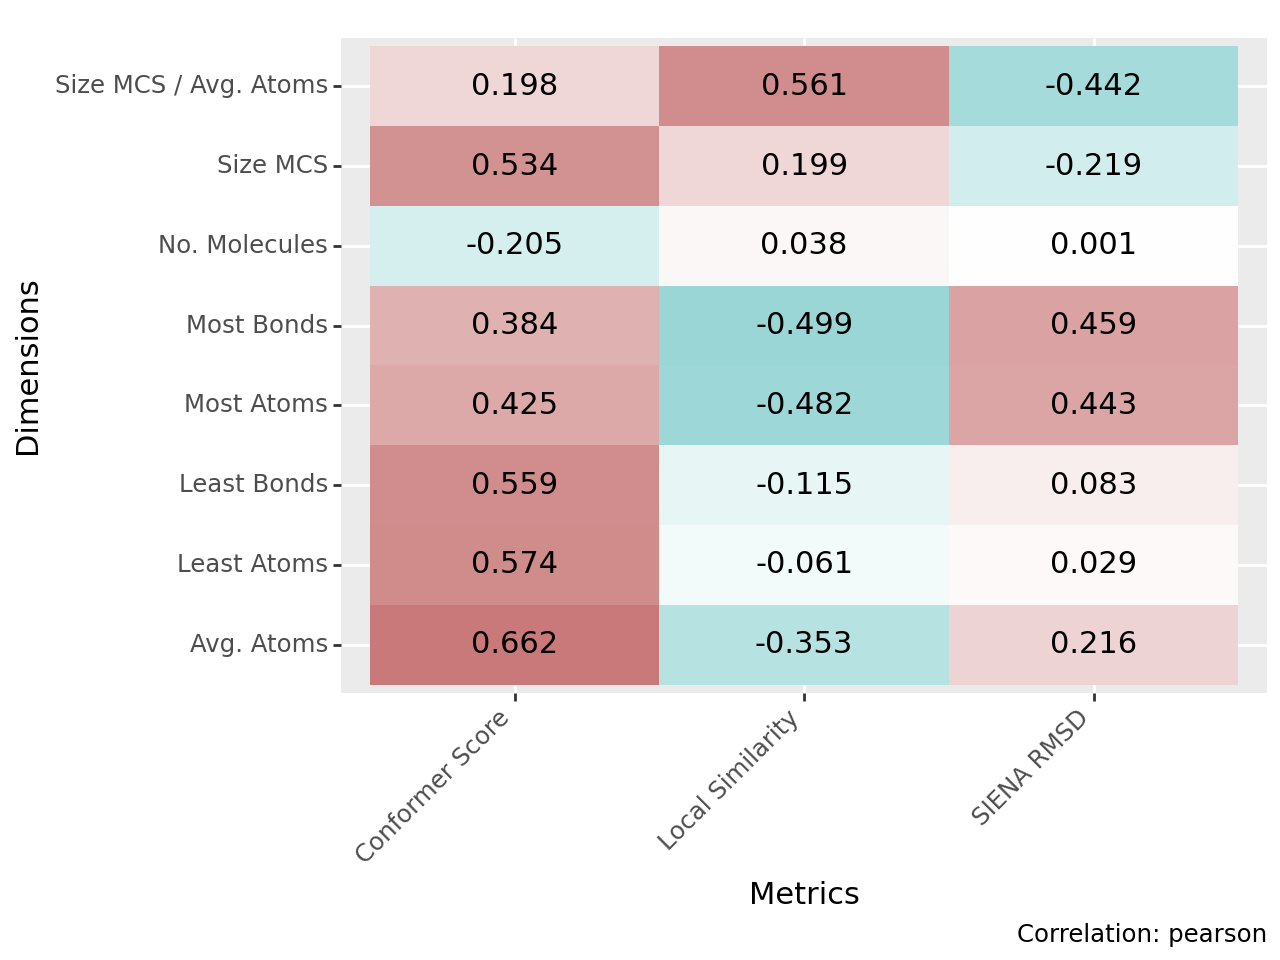

<Figure Size: (640 x 480)>

In [115]:
(ggplot(corr_config, mapping=aes('var2', 'var1', fill='val', label='val'))
 + geom_tile()
 + scale_fill_gradient2(low='#79c9c9', high='#C97979', guide=False)
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + geom_text()
 + labs(x='Metrics', y='Dimensions', caption='Correlation: {}'.format(correlation))
 )

In [116]:
corr_metrics = corr[
    corr['var1'].isin(metric_cols) & corr['var2'].isin(metric_cols)]
corr_metrics = corr_metrics.round({'val': 3})

corr_metrics['var1'] = corr_metrics['var1'].map(lookup_en_name)
corr_metrics['var2'] = corr_metrics['var2'].map(lookup_en_name)


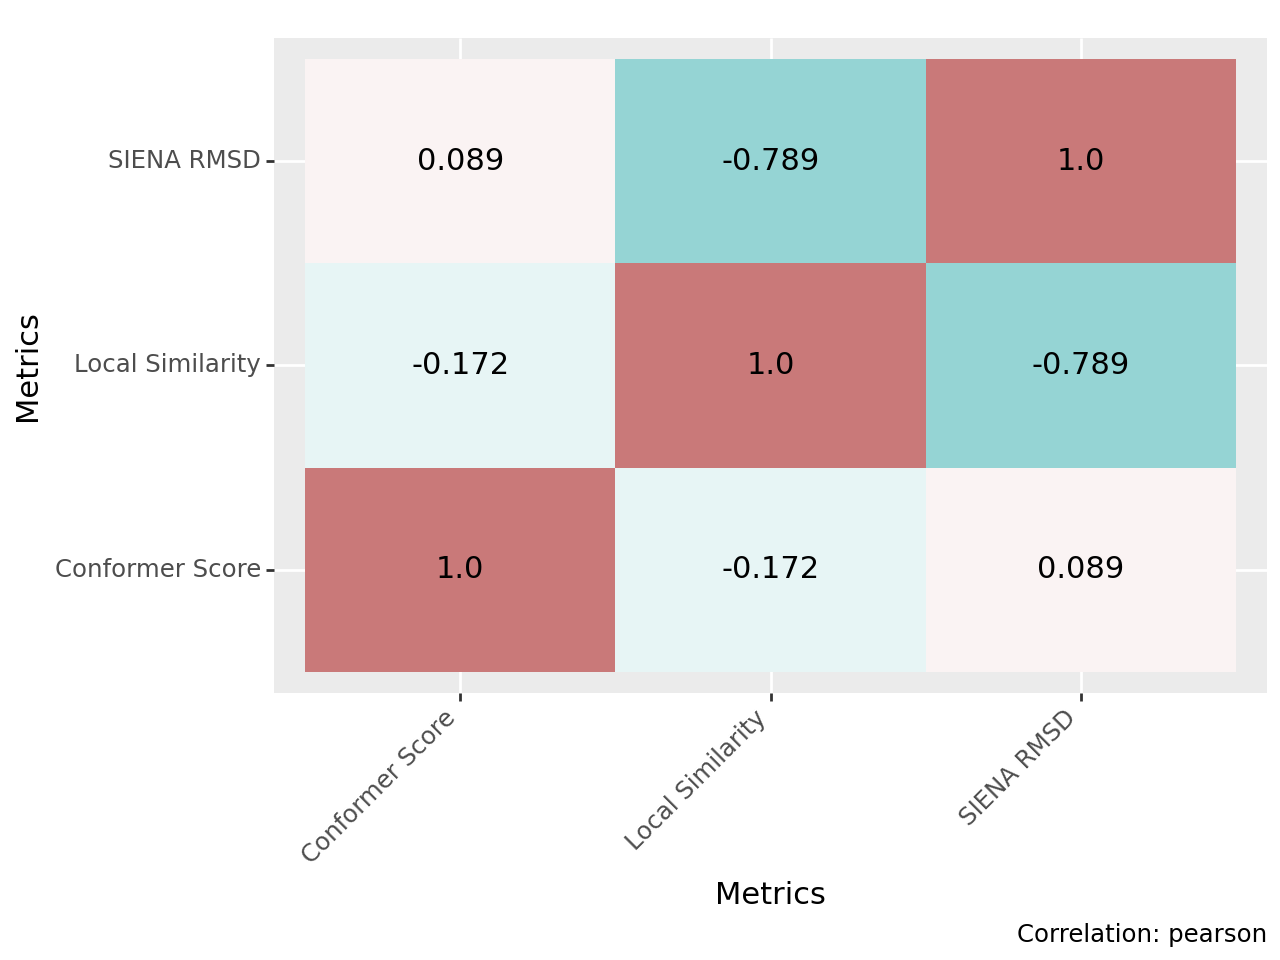

<Figure Size: (640 x 480)>

In [117]:
(ggplot(corr_metrics, mapping=aes('var1', 'var2', fill='val', label='val'))
 + geom_tile()
 + scale_fill_gradient2(low='#79c9c9', high='#C97979', guide=False)
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + geom_text()
 + labs(x='Metrics', y='Metrics', caption='Correlation: {}'.format(correlation))
 )

In [118]:
corr_options = corr[
    corr['var1'].isin(program_parameters) & corr['var2'].isin(metric_cols)]
corr_options = corr_options.round({'val': 3})
corr_options['var1'] = corr_options['var1'].map(lookup_de_name)
corr_options['var2'] = corr_options['var2'].map(lookup_de_name)


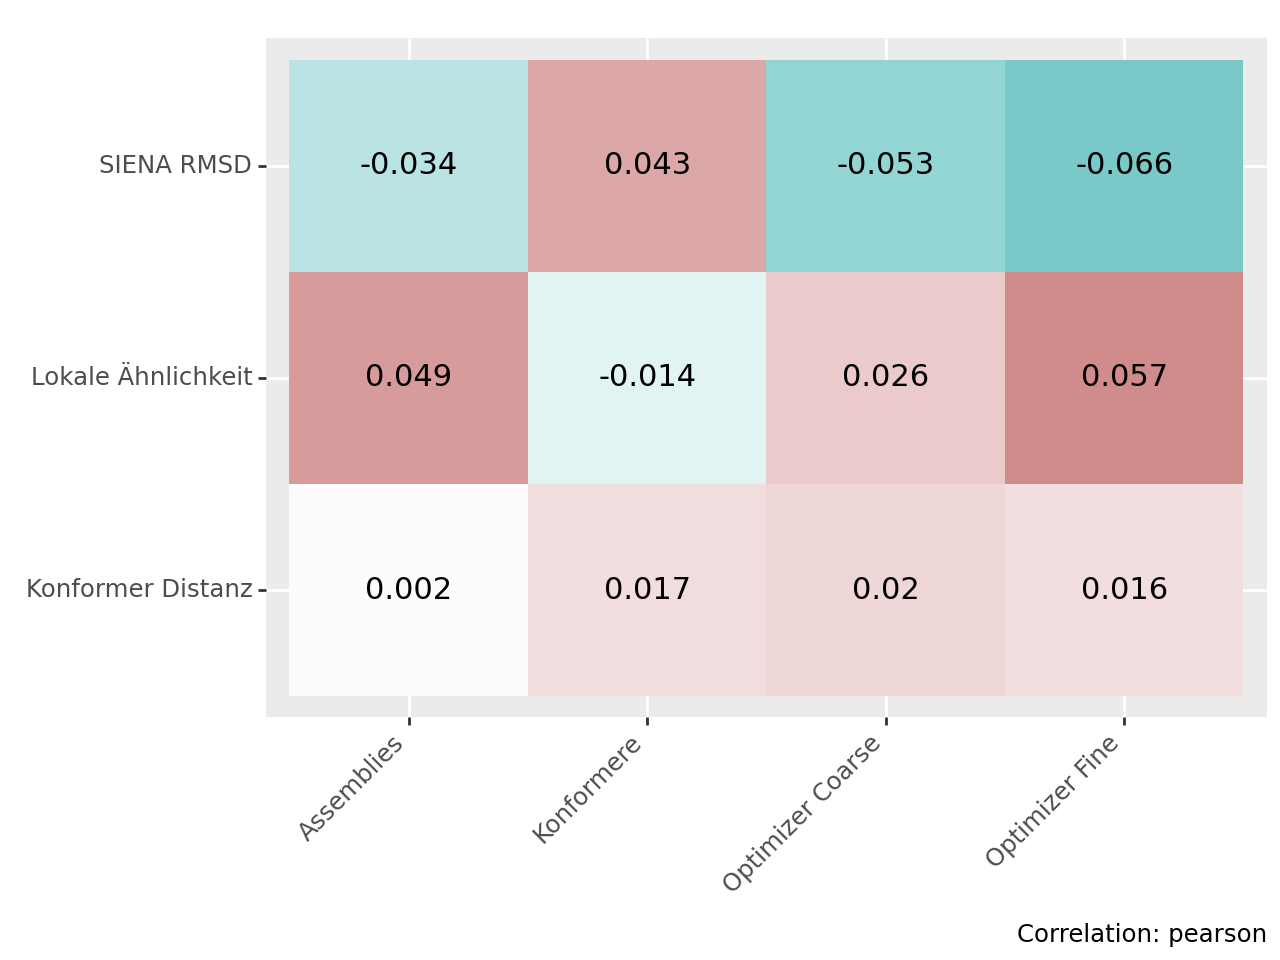

<Figure Size: (640 x 480)>

In [119]:
(ggplot(corr_options, mapping=aes('var1', 'var2', fill='val', label='val'))
 + geom_tile()
 + scale_fill_gradient2(low='#79c9c9', high='#C97979', guide=False)
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + geom_text()
 + labs(x='', y='',caption='Correlation: {}'.format(correlation))
 )


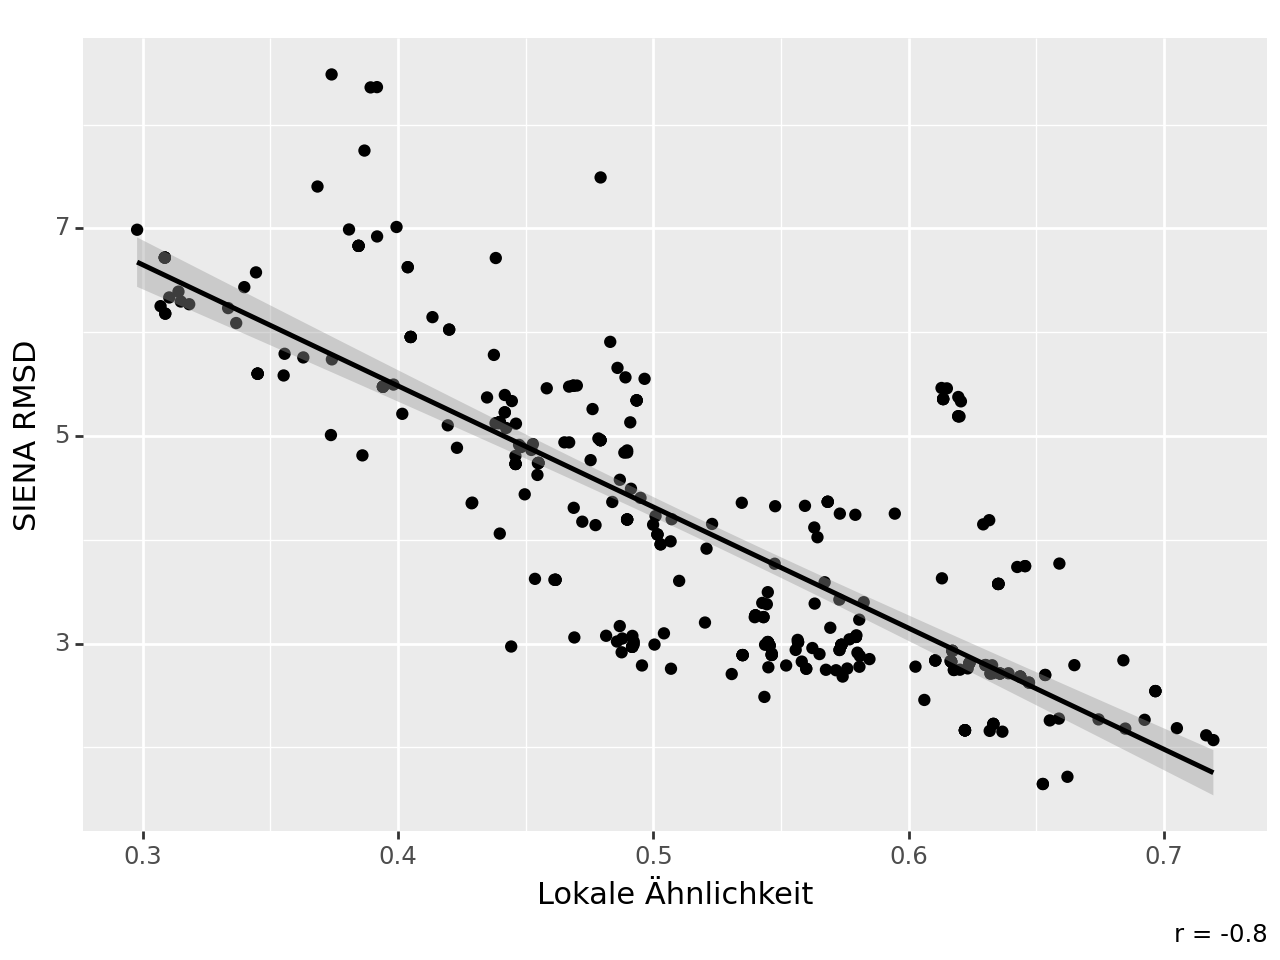

<Figure Size: (640 x 480)>

In [120]:
(ggplot(data=data, mapping=aes(x='local_similarity', y='siena_rmsd'))
 + geom_point()
 + geom_smooth(method='lm')
 + labs(x=lookup_de_name('local_similarity'), y=lookup_de_name('siena_rmsd'), caption='r = -0.8')
 )

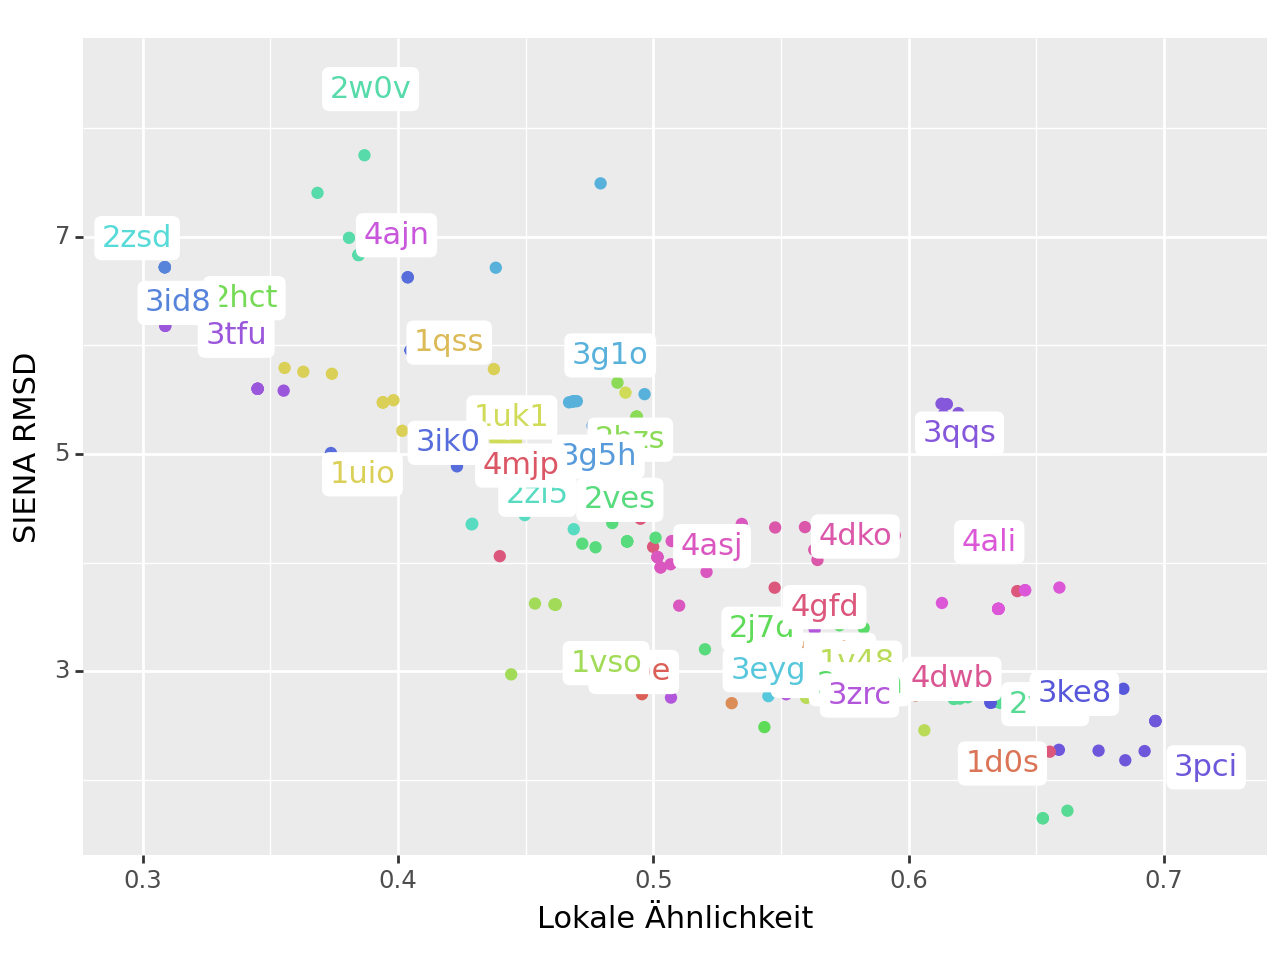

<Figure Size: (640 x 480)>

In [121]:
(ggplot(data=data,
        mapping=aes(x='local_similarity', y='siena_rmsd', colour='name',
                    label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 + labs(x=lookup_de_name('local_similarity'), y=lookup_de_name('siena_rmsd'))
 )


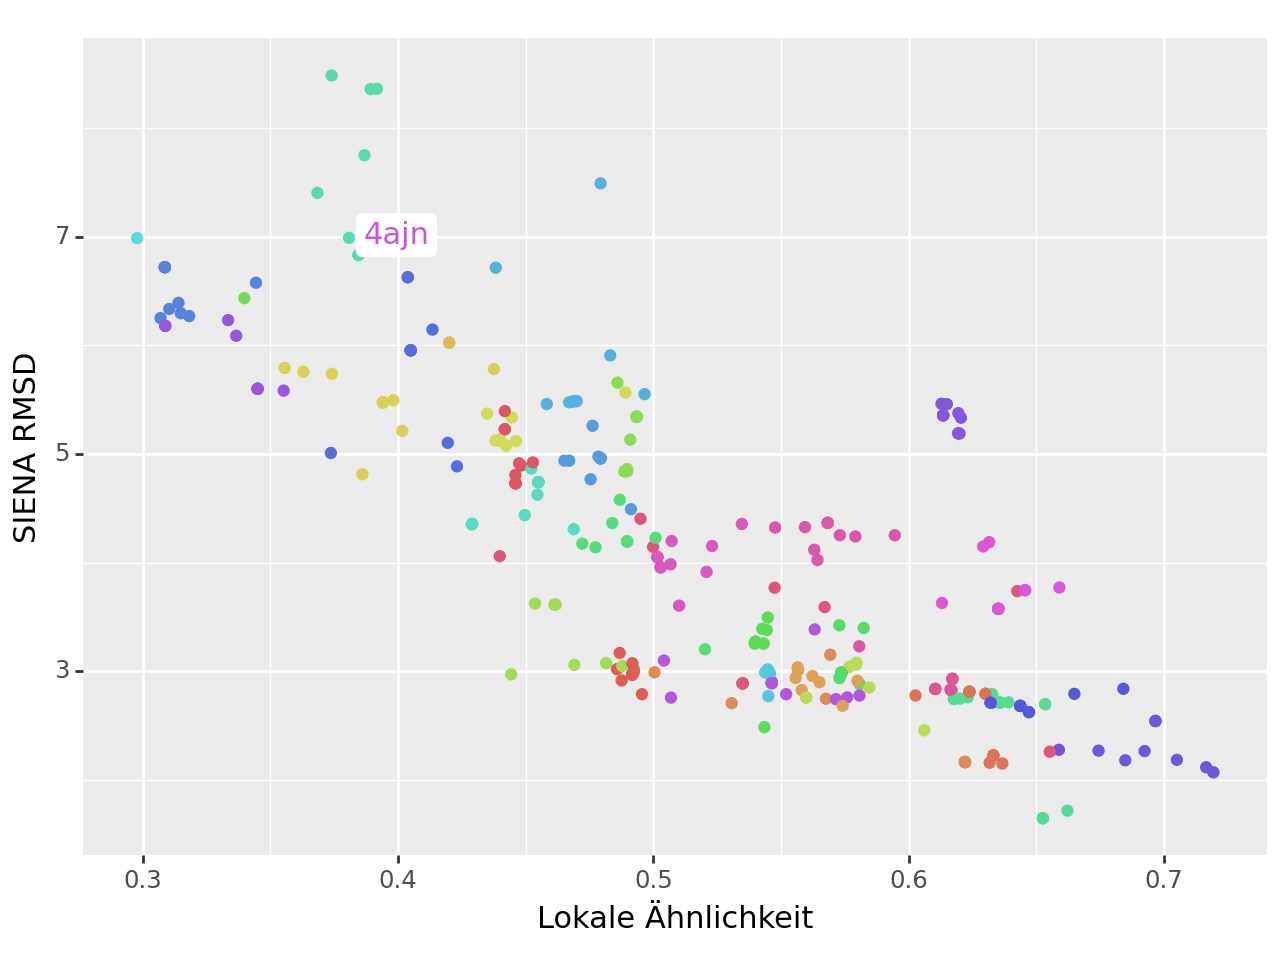

<Figure Size: (640 x 480)>

In [122]:
(ggplot(data=data, mapping=aes(x='local_similarity', y='siena_rmsd', colour='name',
                    label='name'))
 + geom_point()
 + geom_label(data=data.loc[data['name'] == '4ajn'].groupby('name').first().reset_index(), boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 + labs(x=lookup_de_name('local_similarity'), y=lookup_de_name('siena_rmsd'))
 )



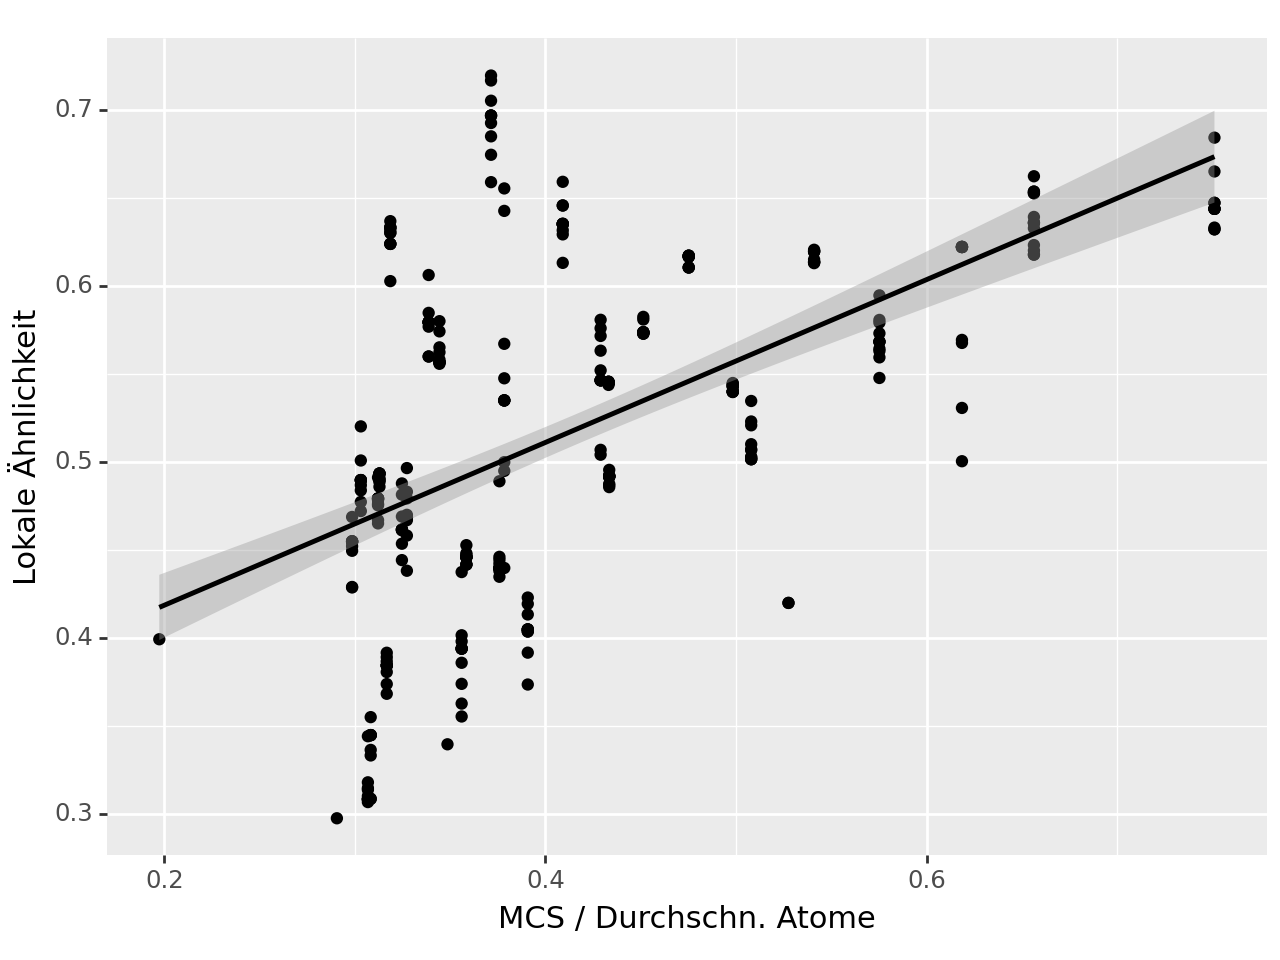

<Figure Size: (640 x 480)>

In [123]:
(ggplot(data=data, mapping=aes(x='mcs_size_to_atom_size', y='local_similarity'))
 + geom_point()
 + geom_smooth(method='lm')
 + labs(x=lookup_de_name('mcs_size_to_atom_size'), y=lookup_de_name('local_similarity'))
 )

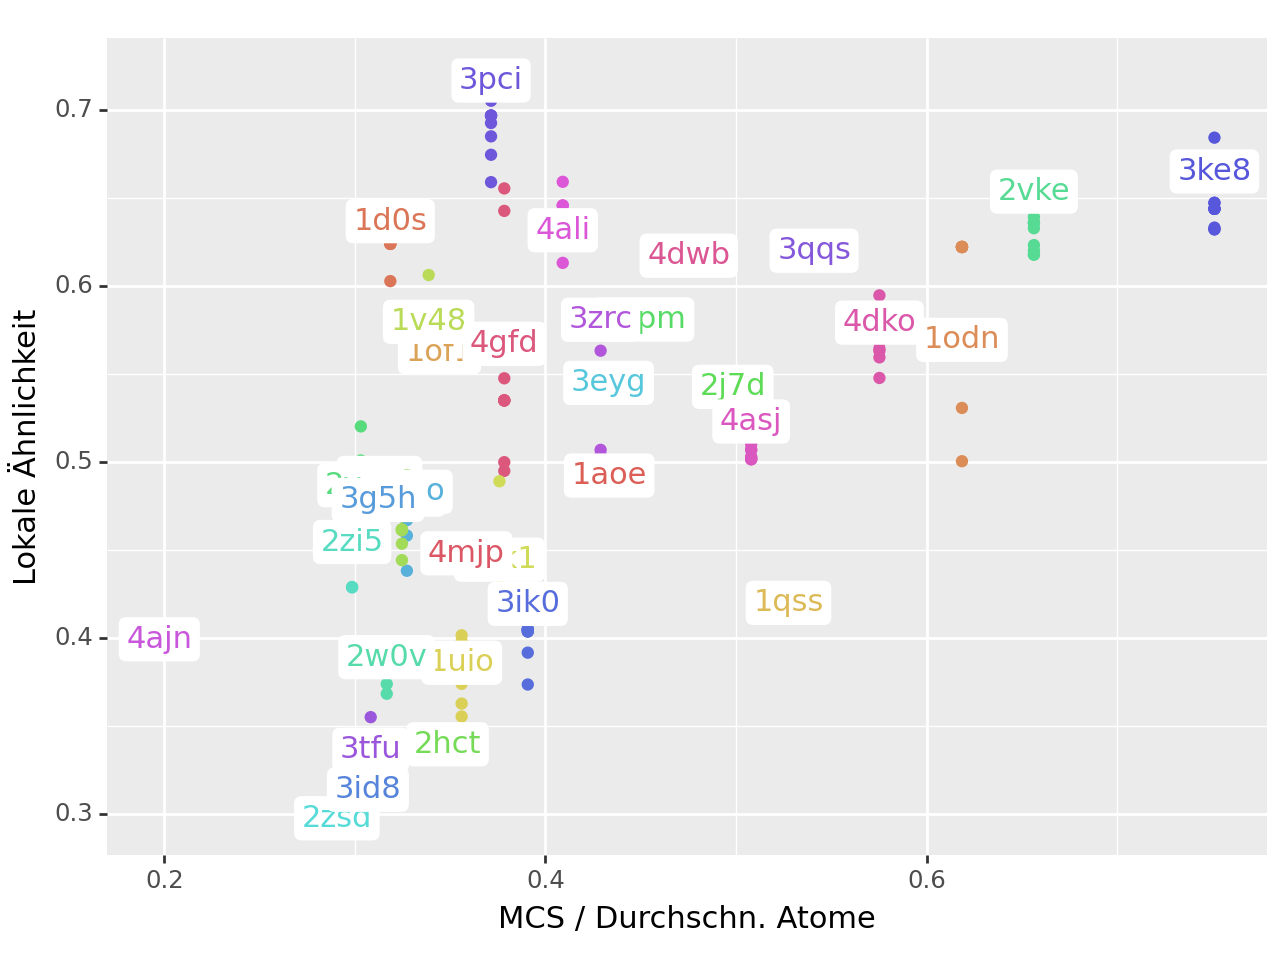

<Figure Size: (640 x 480)>

In [124]:
(ggplot(data=data, mapping=aes(x='mcs_size_to_atom_size', y='local_similarity',
                               colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 + labs(x=lookup_de_name('mcs_size_to_atom_size'), y=lookup_de_name('local_similarity'))
 )


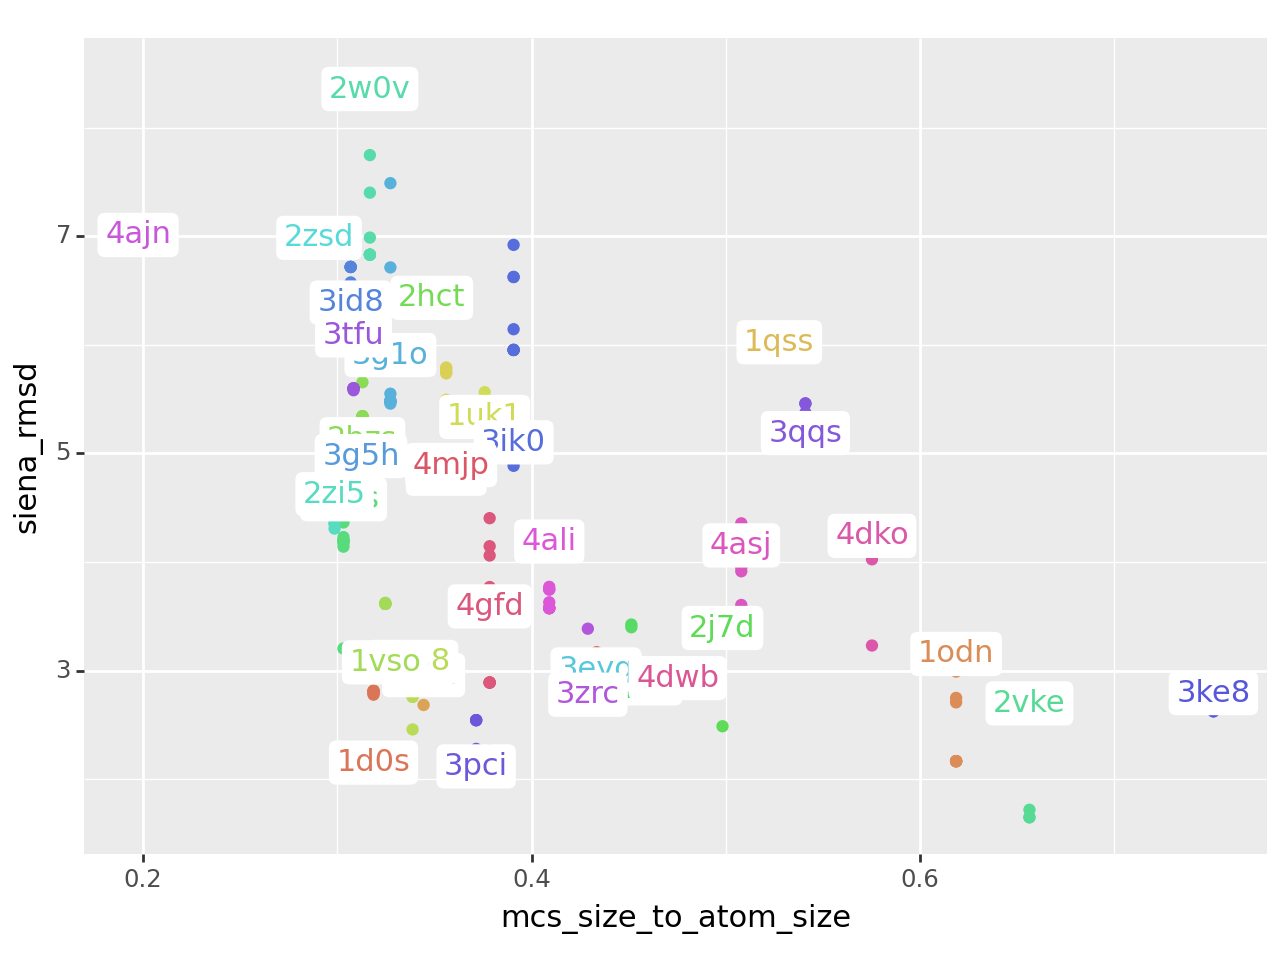

<Figure Size: (640 x 480)>

In [125]:
(ggplot(data=data,
        mapping=aes(x='mcs_size_to_atom_size', y='siena_rmsd', colour='name',
                    label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 )


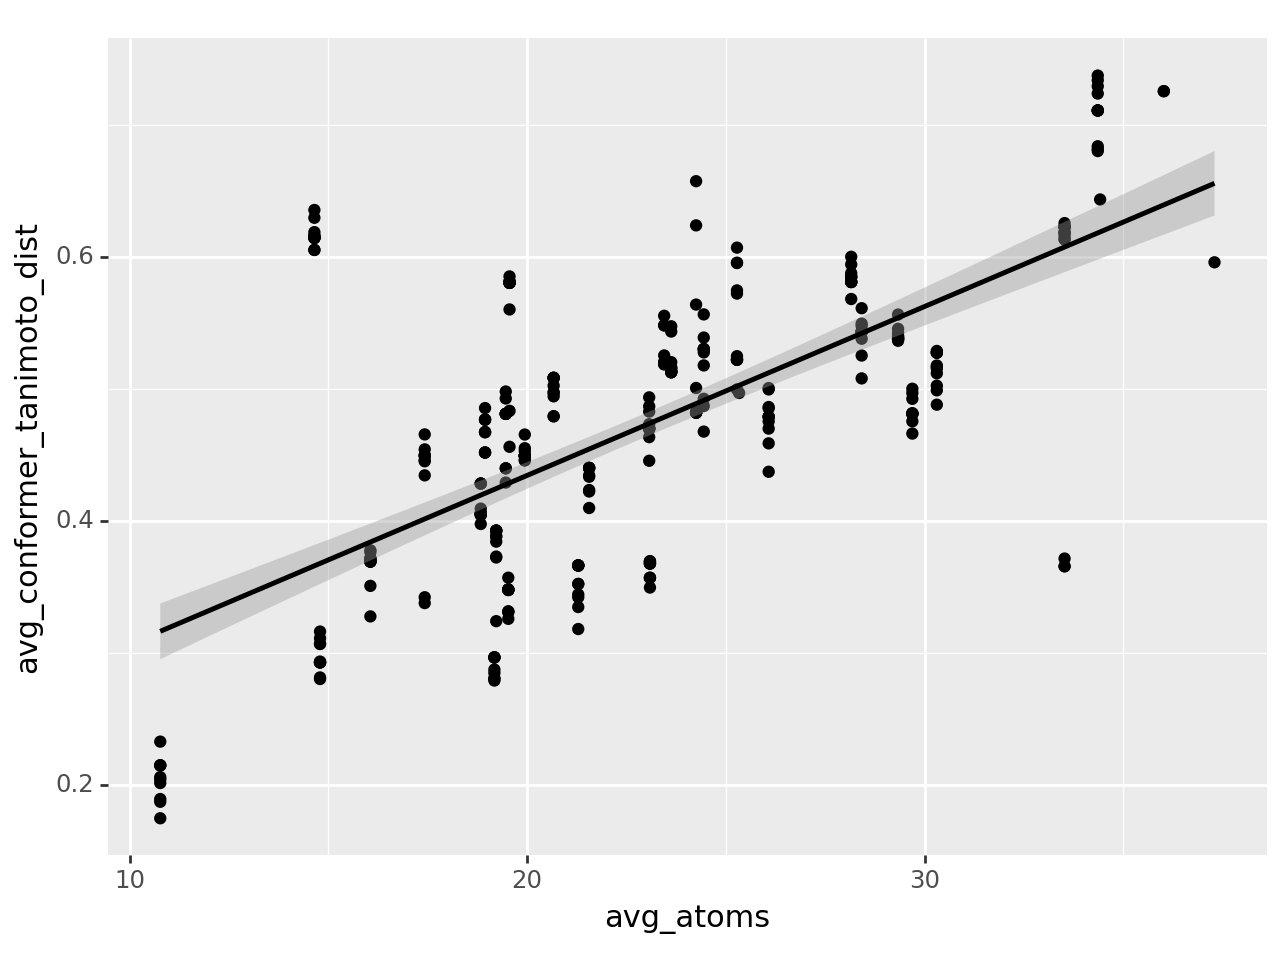

<Figure Size: (640 x 480)>

In [126]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='avg_conformer_tanimoto_dist'))
 + geom_point()
 + geom_smooth(method='lm'))

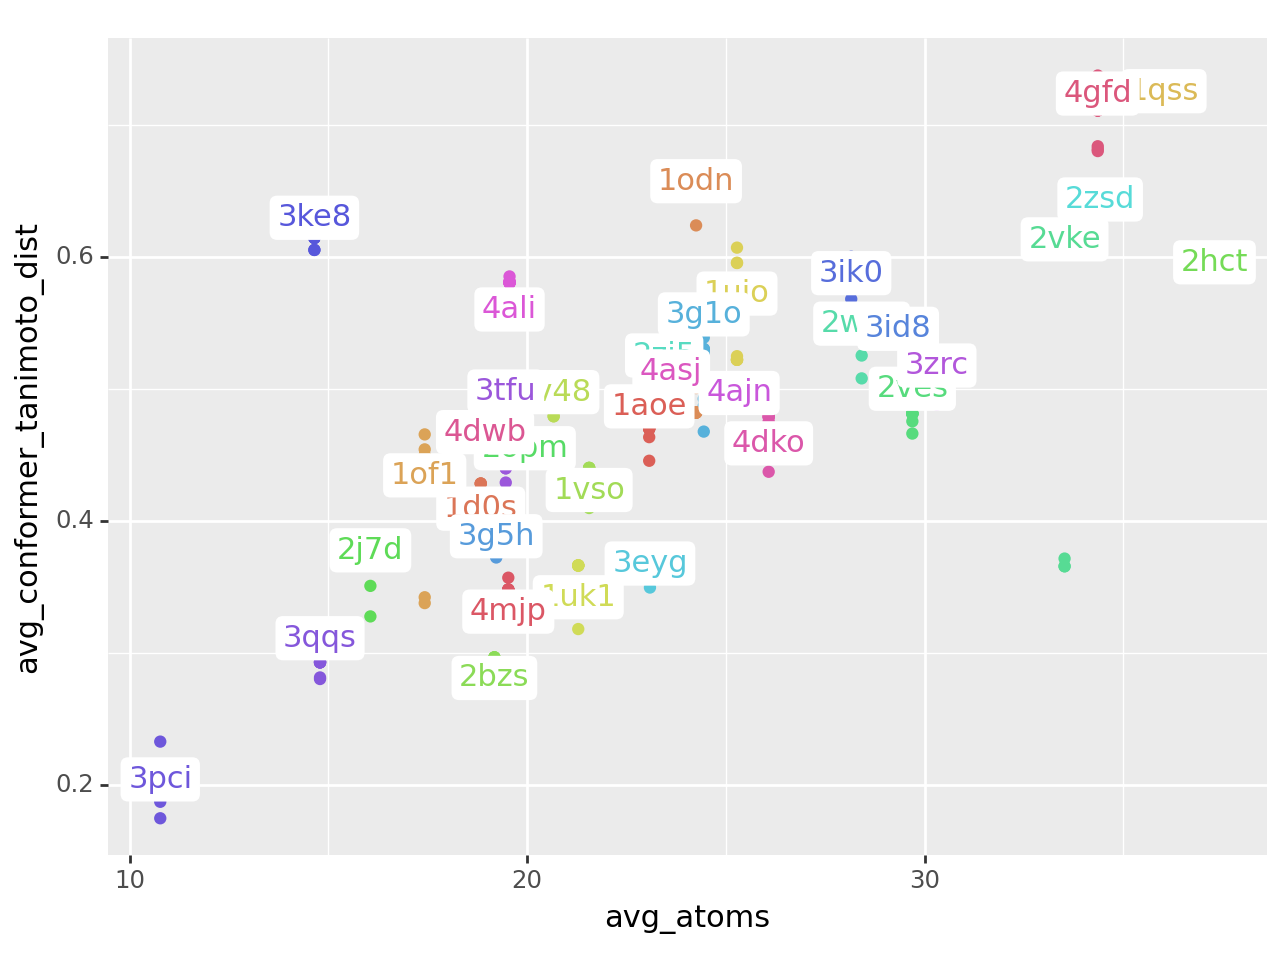

<Figure Size: (640 x 480)>

In [127]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='avg_conformer_tanimoto_dist',
                               colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 )


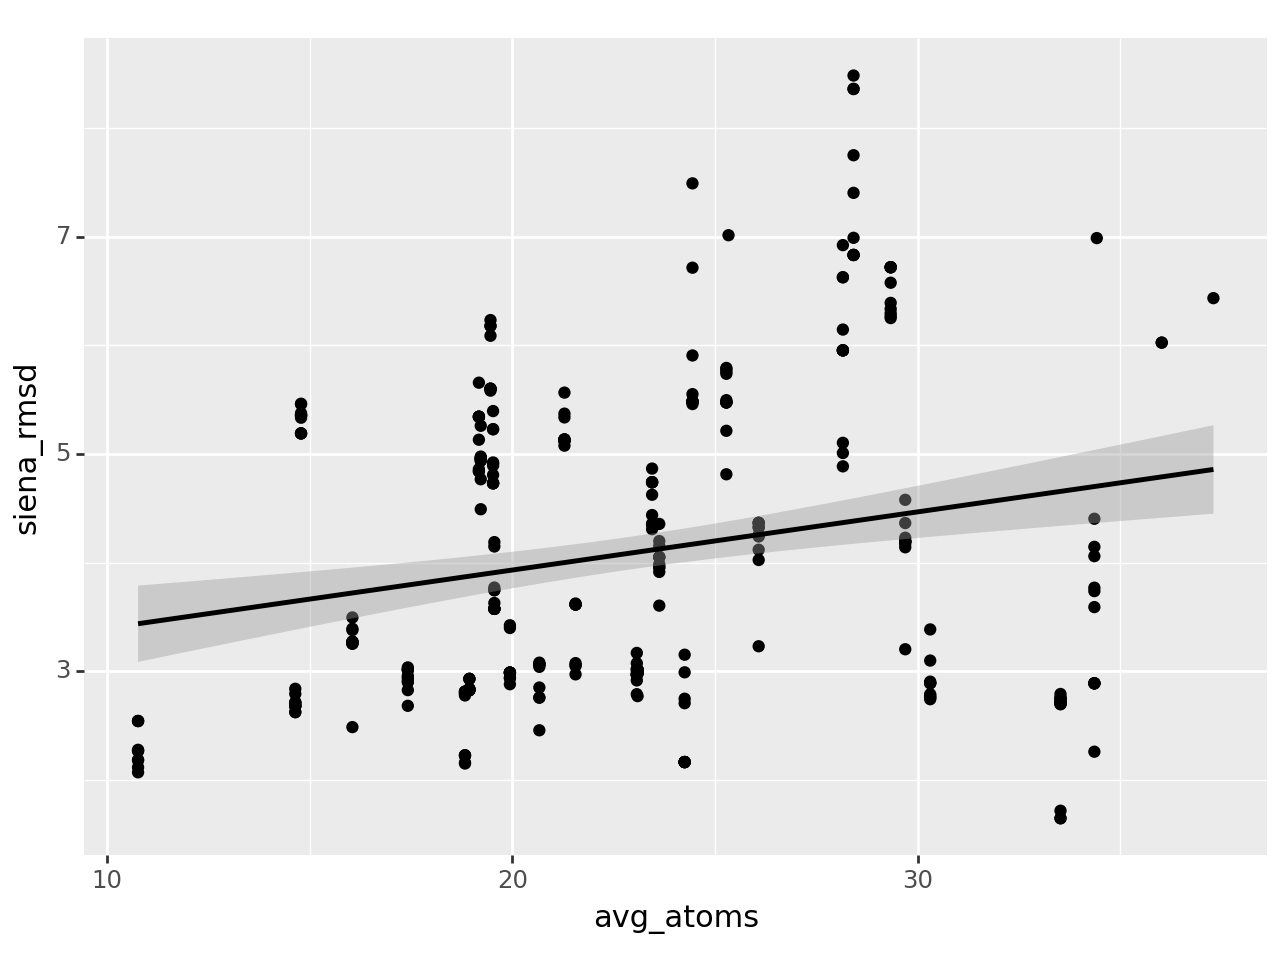

<Figure Size: (640 x 480)>

In [128]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='siena_rmsd'))
 + geom_point()
 + geom_smooth(method='lm'))

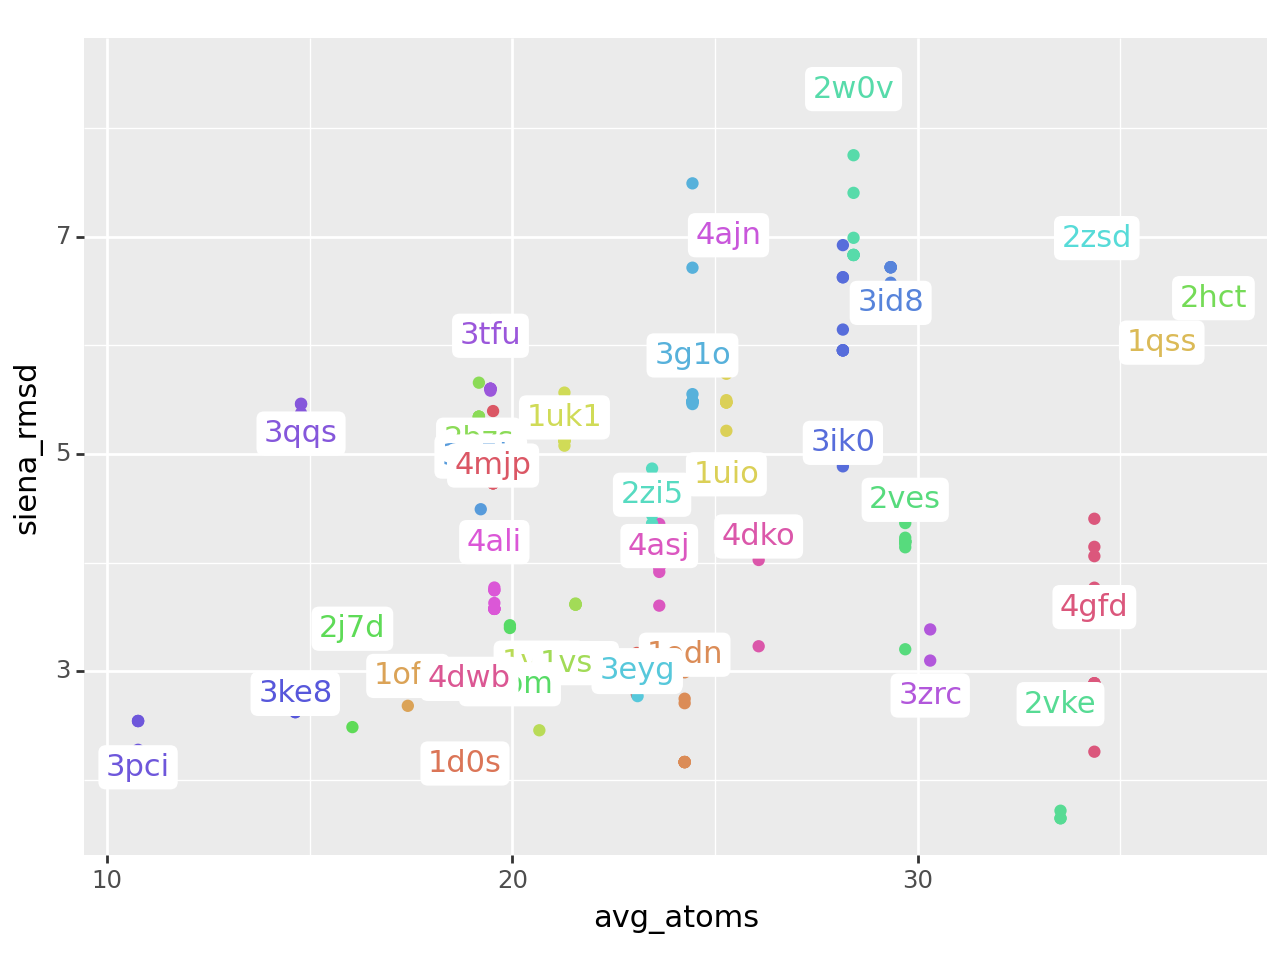

<Figure Size: (640 x 480)>

In [129]:
(ggplot(data=data,
        mapping=aes(x='avg_atoms', y='siena_rmsd', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 )


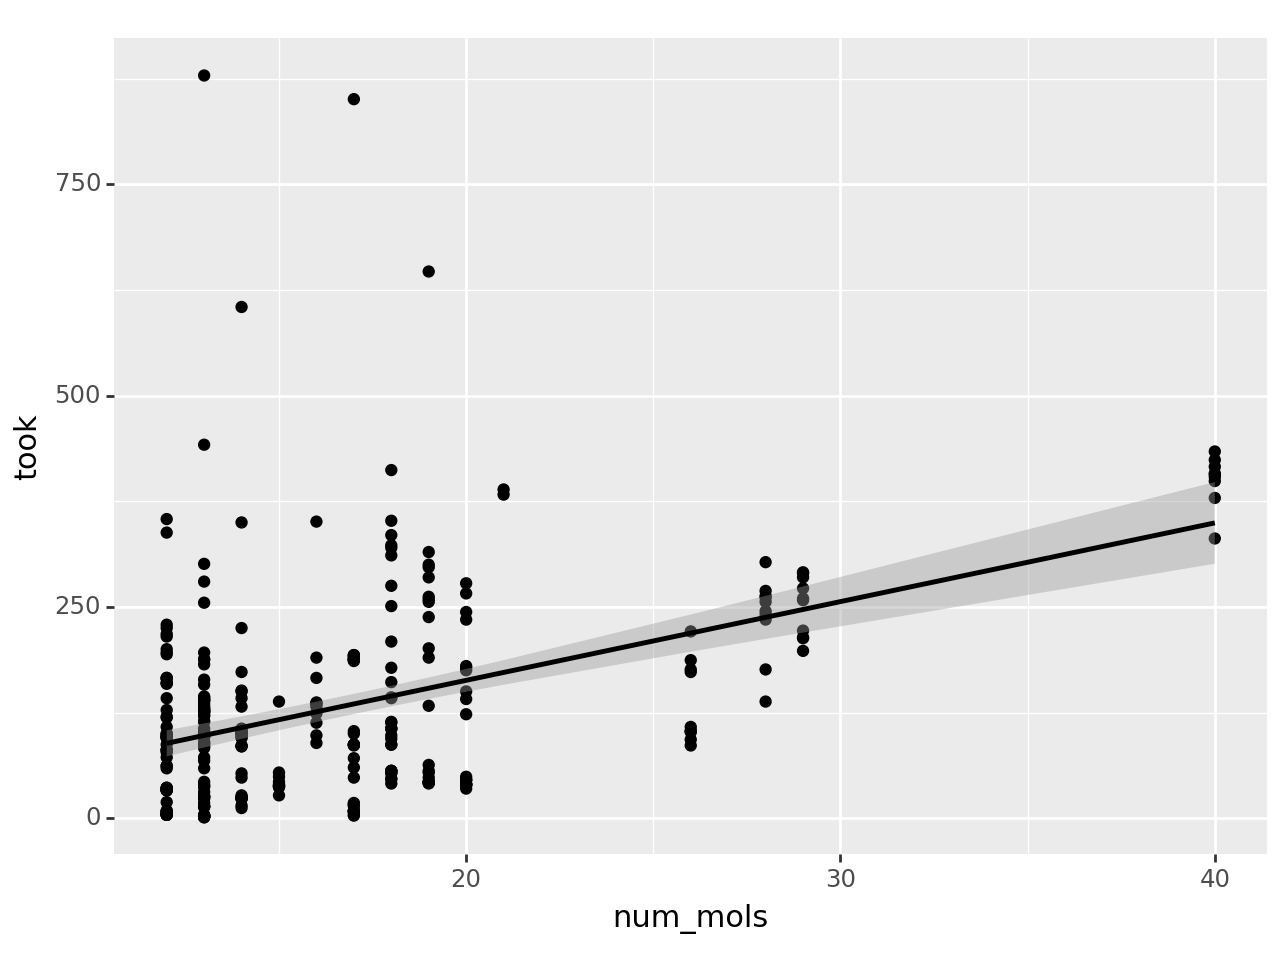

<Figure Size: (640 x 480)>

In [130]:
(ggplot(data=data, mapping=aes(x='num_mols', y='took'))
 + geom_point()
 + geom_smooth(method='lm'))

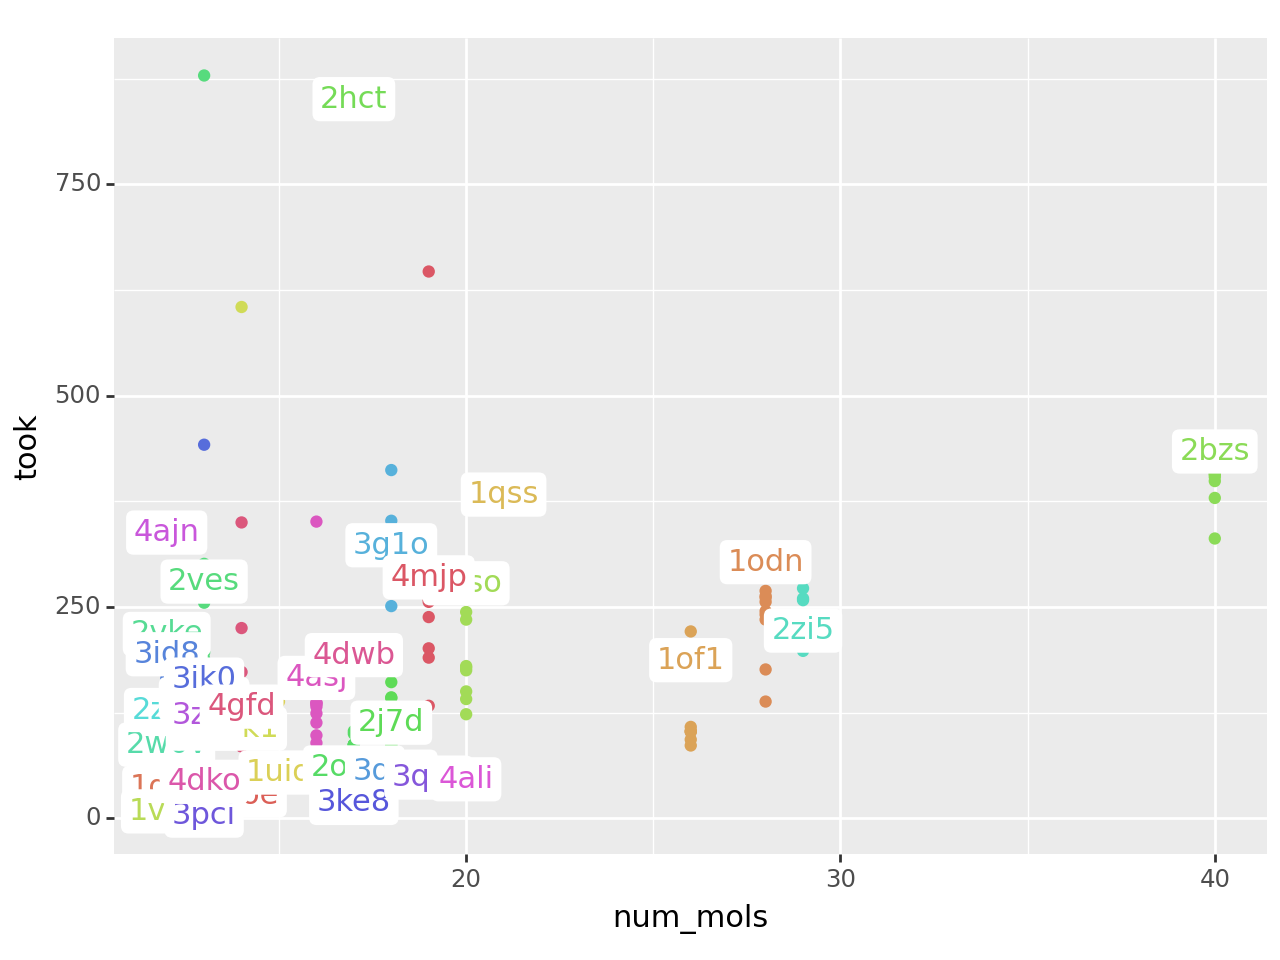

<Figure Size: (640 x 480)>

In [131]:
(ggplot(data=data,
        mapping=aes(x='num_mols', y='took', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 )